In [3]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from matplotlib import gridspec
from NFW_Z import NFW_Z

## NOTE: The following code uses the LOCAL density within spherical shells.

In [79]:
class BestNFWFits:
    
    
    def __init__(self, Mv):
        
        """Initiate the class with a known virial mass of the halo.
        Input: virial mass in solar masses."""
        
        self.Rvir = Mv


    def find_dens_profile(self, raw_radius_data, radius_array, bin_size):
        
        """Derive an AVERAGE dark matter density profile from raw data.
        Inputs:
        1) raw_radius_data: array of the radii at which dark matter particles are found, based on provided data.
        2) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        3) bin_size: integer that best matches the image resolution.
        Output: density_profile (the AVERAGE dark matter density profile of the data)"""
        
        density_profile = np.zeros(np.size(radius_array))
        i = 0
        for radius_value in radius_array: # local density
            particles = np.where((raw_radius_data > radius_value) & (raw_radius_data < (radius_value + bin_size)))
            how_many_particles = np.size(particles)
            shell_volume = 4/3*np.pi*((radius_value + bin_size)**3 - radius_value**3)
            density_profile[i] = how_many_particles / shell_volume * 500 #500 is 500 M_Sun, the mass per particle
            i += 1
        return density_profile
    
    
    def final_plot(self, quoted_Mvir, best_cvir, increased_Mvir_1, best_cvir_1, increased_Mvir_2, best_cvir_2, \
                   redshift, raw_radius_data, radius_array, bin_size):
        
        """Make a ratio plot that compares the actual density profile generated from data with the best NFW fits
        that vary in M_vir and c_vir.
        Inputs:
        1) quoted_Mvir: the virial mass quoted in the provided data.
        2) best_cvir: the c_vir value that gives the best NFW fit to the density profile based on the provided virial mass.
        3) increased_Mvir_1: the virial mass quoted in the provided data, increased by a certain increment.
        4) best_cvir_1: the c_vir value that gives the best NFW fit to the density profile based on the previous increased mass.
        5) increased_Mvir_2: the virial mass quoted in the provided data, increased by twice the abovementioned increment.
        6) best_cvir_2: the c_vir value that gives the best NFW fit to the density profile based on the previous increased mass.
        7) redshift: the redshift at which the data was measured.
        8) raw_radius_data: array of the radii at which dark matter particles are found, based on provided data.
        9) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        10) bin_size: integer that best matches the image resolution.
        Output: the ratio plot, of course!"""
        
        # take in the values
        NFW_1 = NFW_Z(quoted_Mvir) 
        NFW_2 = NFW_Z(increased_Mvir_1)
        NFW_3 = NFW_Z(increased_Mvir_2) 
        
        # extract the density profile array from find_dens_profile
        density_profile = self.find_dens_profile(raw_radius_data, radius_array, bin_size)

        # plot everything
        fig = plt.figure(figsize=(8, 10)) 
        gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) # row, columns, widths

        ax0 = plt.subplot(gs[0]) # top plot
        ax1 = plt.subplot(gs[1]) # bottom plot 

        fig.subplots_adjust(hspace=0.1)  

        ax0.loglog(radius_array, density_profile, 'black', lw=2, label="data")
        ax0.loglog(radius_array, NFW_1.rho(redshift, radius_array, c = best_cvir), '#EC4E20', lw=2, linestyle='-.', \
                  label="NFW1; $M_{vir}$ = 5.23e6, $c_{vir}$ = 9")
        ax0.loglog(radius_array, NFW_2.rho(redshift, radius_array, c = best_cvir_1), '#FF9505', lw=2, linestyle='-.', \
                  label="NFW2; $M_{vir}$ = 6.23e6, $c_{vir}$ = 6")
        ax0.loglog(radius_array, NFW_2.rho(redshift, radius_array, c = best_cvir_2), '#016FB9', lw=2, linestyle='-.', \
                  label="NFW3; $M_{vir}$ = 7.23e6, $c_{vir}$ = 5")

        ax0.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')

        ax1.plot(radius_array, density_profile / NFW_1.rho(redshift, radius_array, c = best_cvir), \
                 '#EC4E20', linestyle='-.', lw=2, label="data/NFW1")
        ax1.plot(radius_array, density_profile / NFW_2.rho(redshift, radius_array, c = best_cvir_1), \
                 '#FF9505', linestyle='-.', lw=2, label="data/NFW2")
        ax1.plot(radius_array, density_profile / NFW_3.rho(redshift, radius_array, c = best_cvir_2), \
                 '#016FB9', linestyle='-.', lw=2, label="data/NFW3")
        
        ax1.legend(bbox_to_anchor=(1.02, 0), loc='lower left')

        ax0.minorticks_on()

        ax0.set_title('density profile of dwarf 2, no RT, z = 6.969,\nplotted with NFW fits that vary in $M_{vir}$ and $c_{vir}$', fontsize=20)
        ax0.set_xticklabels([]) # ignore the x label
        ax0.set_ylabel(r' $\rho$ [M$_\odot$/kpc$^3$] ', fontsize=20)
        ax0.tick_params(axis='both', which='both', direction='in',length=6, width=2)

        plt.xscale('log')

        ax1.set_ylabel('Ratio',fontsize=20)
        ax1.set_xlabel('r (kpc)', fontsize=20)

        ax1.grid()
        ax1.minorticks_on()
        ax1.tick_params(axis='both', which='both', direction='in',length=6, width=1)

        plt.rcParams.update({'font.size': 15})
        
        # lo and behold!
        plt.show()

In [80]:
bin_size = 0.02
starting_radius = 0.02

전data091_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0091.txt")
dx091_noRT = 전data091_noRT[:,4] / 1000 # converting pc to kpc
dy091_noRT = 전data091_noRT[:,5] / 1000 # converting pc to kpc
dz091_noRT = 전data091_noRT[:,6] / 1000 # converting pc to kpc
r091_noRT = np.sqrt(dx091_noRT**2 + dy091_noRT**2 + dz091_noRT**2) # max: 0.9686656127584315 kpc, closest to 0.97 kpc
print(max(r091_noRT))
rad_array091_noRT = np.arange(starting_radius, 0.97, bin_size) # unit: kpc

density_profile091_noRT = np.zeros(np.size(rad_array091_noRT))
i = 0
for radius_value in rad_array091_noRT:
    particles = np.where((r091_noRT > radius_value) & (r091_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3 - radius_value**3)
    density_profile091_noRT[i] = how_many_particles / shell_volume * 500
    i += 1
    
mass_profile091_noRT = np.zeros(np.size(rad_array091_noRT))
h = 0
for radius_value in rad_array091_noRT:
    particles = np.where((r091_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile091_noRT[h] = how_many_particles * 500
    h += 1

0.9686656127584315


In [81]:
halo6 = NFW_Z(mass_profile091_noRT[np.size(mass_profile091_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s(6.892)
c_vir6 = halo6.c_vir(6.892)
print('r_s =', r_s6)
print('c_vir =', c_vir6)

r_s = 0.06442191163574262
c_vir = 18.299717279010302


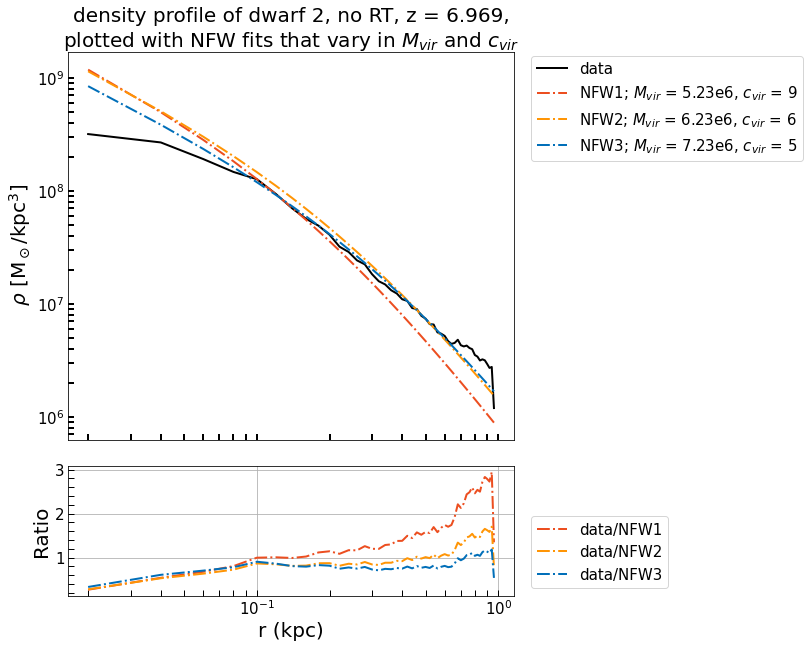

In [82]:
quoted_Mvir = 1.374923e+07 # in solar masses
best_cvir = 5
increased_Mvir_1 = quoted_Mvir + 1e7
best_cvir_1 = 4
increased_Mvir_2 = quoted_Mvir + 2e7
best_cvir_2 = 3
redshift = 6.892

redshift_7 = BestNFWFits(1.374923e+07)
redshift_7.final_plot(1.374923e+07, best_cvir, quoted_Mvir + 1e7, best_cvir_1, quoted_Mvir + 2e7, best_cvir_2, \
                   redshift, r091_noRT, rad_array091_noRT, bin_size)

In [83]:
bin_size = 0.02
starting_radius = 0.02

전data090_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0090.txt")
dx090_noRT = 전data090_noRT[:,4] / 1000 # converting pc to kpc
dy090_noRT = 전data090_noRT[:,5] / 1000 # converting pc to kpc
dz090_noRT = 전data090_noRT[:,6] / 1000 # converting pc to kpc
r090_noRT = np.sqrt(dx090_noRT**2 + dy090_noRT**2 + dz090_noRT**2) # max: 0.7147123920374194 kpc, closest to 0.72 kpc
print(max(r090_noRT))
rad_array090_noRT = np.arange(starting_radius, 0.72, bin_size) # unit: kpc

density_profile090_noRT = np.zeros(np.size(rad_array090_noRT))
i = 0
for radius_value in rad_array090_noRT:
    particles = np.where((r090_noRT > radius_value) & (r090_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3 - radius_value**3)
    density_profile090_noRT[i] = how_many_particles / shell_volume * 500
    i += 1
    
mass_profile090_noRT = np.zeros(np.size(rad_array090_noRT))
h = 0
for radius_value in rad_array090_noRT:
    particles = np.where((r090_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile090_noRT[h] = how_many_particles * 500
    h += 1

0.7147123920374194


In [84]:
halo6 = NFW_Z(mass_profile090_noRT[np.size(mass_profile090_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s(6.969)
c_vir6 = halo6.c_vir(6.969)
print('r_s =', r_s6)
print('c_vir =', c_vir6)

r_s = 0.043025544046299616
c_vir = 19.655571995221006


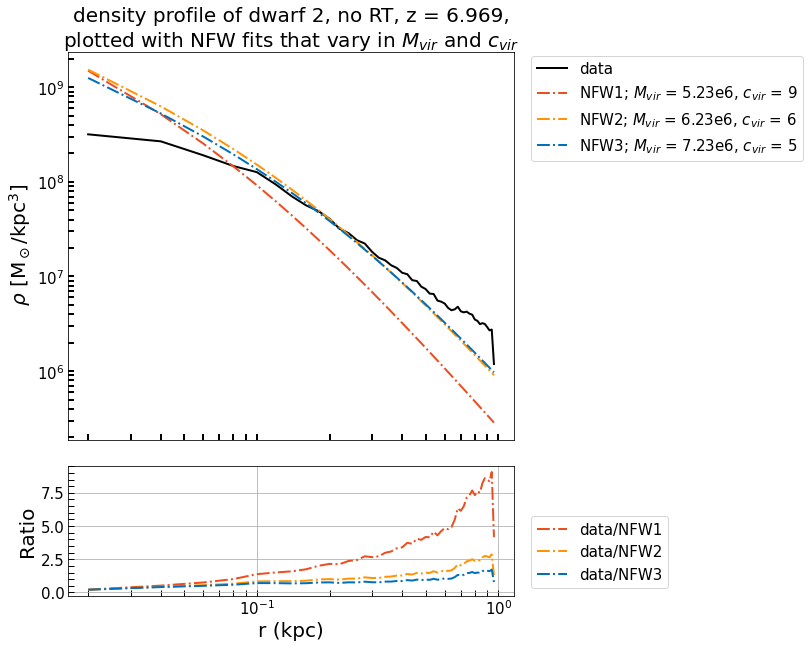

In [85]:
quoted_Mvir = 5.228395e+06 # in solar masses
best_cvir = 9
increased_Mvir_1 = quoted_Mvir + 1e6
best_cvir_1 = 6
increased_Mvir_2 = quoted_Mvir + 2e6
best_cvir_2 = 5
redshift = 6.969

redshift_7 = BestNFWFits(5.228395e+06)
redshift_7.final_plot(5.228395e+06, best_cvir, quoted_Mvir + 1e7, best_cvir_1, quoted_Mvir + 2e7, best_cvir_2, \
                   redshift, r091_noRT, rad_array091_noRT, bin_size)